## Credit Risk 
Credit risk is the chance that a borrower may fail to make punctual payments and default on their financial obligations.  It signifies the chance that a lender may not receive the expected interest or principal payments as per  schedule.

Financial institutions are concentrated on reducing the risk of default. As a result, a variety of organizations, including commercial and investment banks, venture capital firms, asset management businesses, and insurance corporations, among others, are depending more and more on technology to identify which clients are most likely to break their obligations.

In [2]:
# libraries
#!pip install xgboost
import pandas as pd
from scipy import stats
import numpy as np
from scipy import stats
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost as xgb





## Step 1 : Read the dataset

The data set was taken from Kaggle

In [3]:
data = pd.read_csv("credit_risk_dataset.csv")

# Use map() to convert categorical data to numerical data

#data['person_home_ownership'] = data['person_home_ownership'].map({'RENT': 1, 'OWN	': 2, 'MORTGAGE' : 3, 'OTHERS': 4})
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Step 2 :Visualisation the dataset

Generates a grid of histograms and bar plots to help visualize the data distribution and relationships within the dataset, making it easier to understand the characteristics of each column. Few columns are numerical and catagorical values.

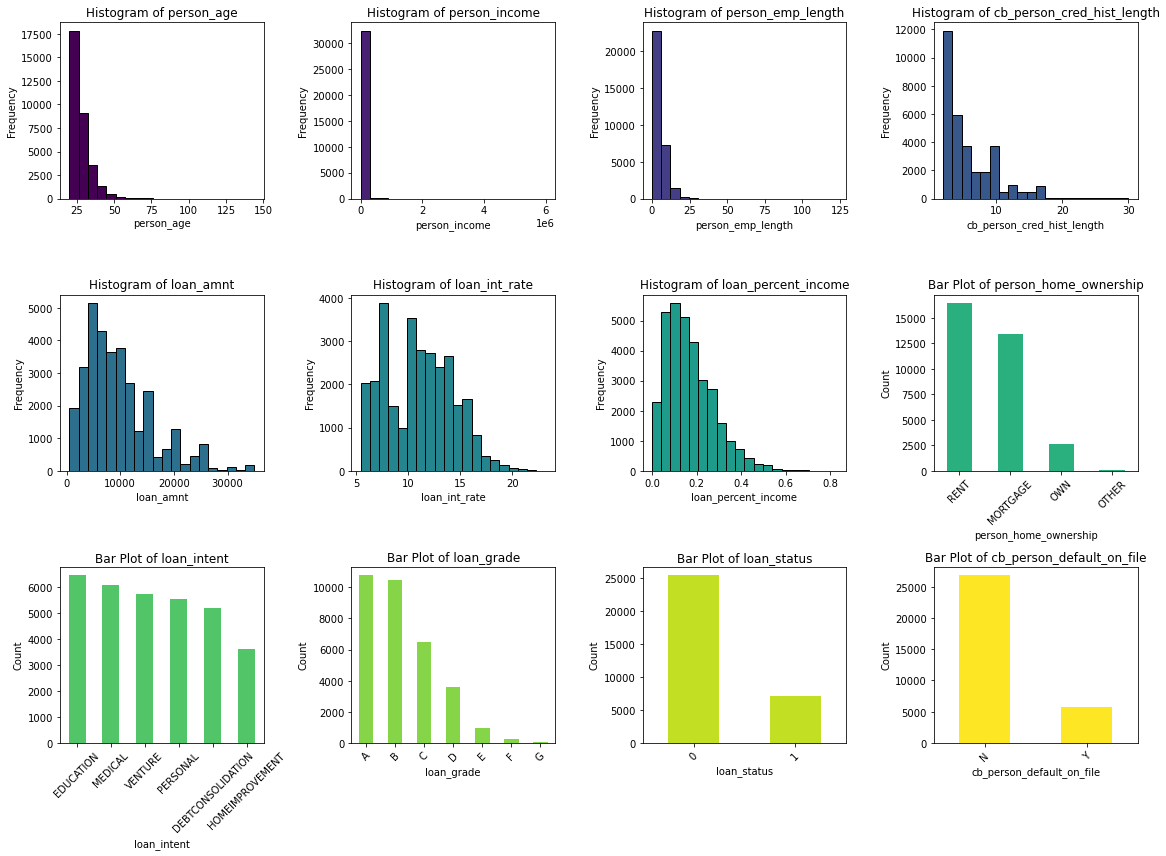

In [4]:
# Get a list of all column names
all_columns = ['person_age', 'person_income', 'person_emp_length', 'cb_person_cred_hist_length','loan_amnt', 'loan_int_rate', 'loan_percent_income','person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'cb_person_cred_hist_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Calculate the number of rows and columns for the subplots grid
num_rows = 3  #  adjust the number of rows and columns as needed
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Flatten the axes array to make it easier to iterate through
axes = axes.ravel()

# Define a colormap for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(all_columns)))

# Plot each column in a subplot
for i, col in enumerate(all_columns):
    if i < len(all_columns):
        ax = axes[i]
        if col in numerical_columns:
            ax.hist(data[col], bins=20, edgecolor='k', color=colors[i])
            ax.set_title(f'Histogram of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
        else:
            data[col].value_counts().plot(kind='bar', ax=ax, color=colors[i])
            ax.set_title(f'Bar Plot of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


## Step 3 :  Missing Value detection 
'data.isnull()' function used to check for missing values in a dataset. Only two column found as a missing values. The bar plot provides a visual representation of which columns have missing data and the extent of the missing data for each column. It helps in identifying columns with a high percentage of missing values, which may require further investigation or handling during data preprocessing.

In [5]:
# Check for missing values
missing_values = data.isnull()
missing_counts = missing_values.sum()
print(missing_counts)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


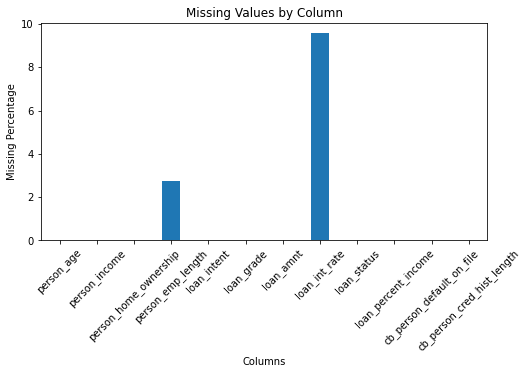

In [6]:
# Calculate the percentage of missing values in each column
missing_percentage= (missing_counts/ len(data)) * 100

# Create a bar plot to visualisa the missing value
plt.figure(figsize=(8, 4))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)
plt.show()



In [7]:
# provides statistics about the dataset, including the count of NaN
data.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


## Step 4 : Convert columns into numerical value

The purpose of converting categorical columns into numerical values is to make the data suitable for machine learning algorithms, as many algorithms require numerical input. By replacing categories with numerical codes, we can retain the categorical information while enabling algorithms to process the data effectively. After running this code, the columns mentioned in each section will contain numerical representations of their original categorical values.

In [9]:
# convert  into numerical value of person_home_ownership column

output = []
for x in data['person_home_ownership']:
    if x not in output:
        output.append(x)
print(output)

for i in range(len(output)):
    data.loc[data["person_home_ownership"] == output[i], "person_home_ownership"] = i

# convert  into numerical value of loan_intent column

output2 = []
for x in data['loan_intent']:
    if x not in output2:
        output2.append(x)
print(output2)

for i in range(len(output2)):
    data.loc[data["loan_intent"] == output2[i], "loan_intent"] = i


# convert  into numerical value of loan_ grade column

output3 = []
for x in data['loan_grade']:
    if x not in output3:
        output3.append(x)
print(output3)

for i in range(len(output3)):
    data.loc[data["loan_grade"] == output3[i], "loan_grade"] = i


# convert cb_person_default_on_file column into numerical value

output4 = []
for x in data['cb_person_default_on_file']:
    if x not in output4:
        output4.append(x)
print(output4)


for i in range(len(output4)):
    data.loc[data["cb_person_default_on_file"] == output4[i], "cb_person_default_on_file"] = i



[0, 1, 2, 3]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1]


In [10]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,0,35000,16.02,1,0.59,0,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,1,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,1,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,1,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,1.0,0,2,5800,13.16,0,0.11,1,30
32577,54,120000,2,4.0,0,3,17625,7.49,0,0.15,1,19
32578,65,76000,0,3.0,4,1,35000,10.99,1,0.46,1,28
32579,56,150000,2,5.0,0,1,15000,11.48,0,0.10,1,26


In [11]:
# types of dataset
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [12]:
# convent datatype to numeric

data['person_home_ownership'] = pd.to_numeric(data['person_home_ownership'])
data['loan_intent'] = pd.to_numeric(data['loan_intent'])
data['loan_grade '] = pd.to_numeric(data['loan_grade'])
data['cb_person_default_on_file '] = pd.to_numeric(data['cb_person_default_on_file'])


In [13]:
# define the data tyes
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_grade                      int64
cb_person_default_on_file       int64
dtype: object

In [14]:
# Check for Non-Numeric Values
# errors='coerce' parameter, which will replace non-numeric values with NaN
data['loan_grade'] = pd.to_numeric(data['loan_grade'], errors='coerce')
data['cb_person_default_on_file'] = pd.to_numeric(data['cb_person_default_on_file'], errors='coerce')

# handling Missing Values
data['loan_grade'].fillna(0, inplace=True)
data['cb_person_default_on_file'].fillna(0, inplace=True)
# define the data tyes
data['loan_grade'] = data['loan_grade'].astype(int)
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].astype(int)


In [15]:
# define the data tyes
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int32
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
loan_grade                      int64
cb_person_default_on_file       int64
dtype: object

## Step 5 : Handle missing value

The KNN imputation technique has been used to fill in missing values for column of 'person_emp_length' and 'loan_int_rate'. As a result, the dataset no longer contains missing values in these two columns, making it more suitable for further analysis or machine learning modeling. KNN imputation replaces missing values with estimated values based on similar observations in the dataset, providing a way to retain as much information as possible.


In [16]:
# Imputation with a Statistical Model for handle missing value
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data['person_emp_length'] = imputer.fit_transform(data[['person_emp_length']])
data['loan_int_rate'] = imputer.fit_transform(data[['loan_int_rate']])

In [17]:
remaining_missing_values = data.isnull().sum()
remaining_missing_values

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_grade                    0
cb_person_default_on_file     0
dtype: int64

## Step 6 : Divided the dataset for prediction

separates the dataset into features (X) and labels (y), making it ready for use in machine learning models. The target variable 'loan_status' contains binary labels (0 and 1), and the features (X) contain the remaining columns used for prediction. The output shows that there are 25473 instances with a label of 0 and 7108 instances with a label of 1.

In [18]:
# Separate the data into labels and features
# Separate the X variable, the features
# Separate the y variable, the labels
target = 'loan_status'
y = data[target]

# Separate the X variable, the features
X = data.drop(target,axis=1)



In [19]:
display(X.head())
display(y.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file
0,22,59000,0,123.0,0,0,35000,16.02,0.59,0,3,0,0
1,21,9600,1,5.0,1,1,1000,11.14,0.10,1,2,1,1
2,25,9600,2,1.0,2,2,5500,12.87,0.57,1,3,2,1
3,23,65500,0,4.0,2,2,35000,15.23,0.53,1,2,2,1
4,24,54400,0,8.0,2,2,35000,14.27,0.55,0,4,2,0


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [20]:
# Check the target values
y.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

##  Step 7 : Build Logistic Regression Model
Split the data into training and testing datasets by using train_test_split.Fit a logistic regression model by using the training data. Make the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.
Evaluate the model’s performance by doing the following
 
 * Calculate the score of accuracy of Logistic Regression measure of how many predictions the model got correct out of the total predictions.
 * Make a confusion matrix that summarizes the performance of a classification algorithm.
 * Generate a dataframe of Original loan status vs Predicted loan status
 * Create a Classification Report

In [21]:
# Import the train_test_learn module

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
logistic_model = LogisticRegression()
# Train the model
logistic_model.fit(X_train, y_train)
# Make predictions
y_pred = logistic_model.predict(X_test)
# Make accuracy
accuracy = accuracy_score(y_test, y_pred)
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
report  = classification_report(y_test, y_pred, target_names=["'0' as non default", "'1'as default"])

# call the Accuracy
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)

OriginalVsPredictedlabel = pd.DataFrame({'Original loan status':y_test, 'Predicted loan status': y_pred})
OriginalVsPredictedlabel

Accuracy: 0.7983734847322388

Confusion Matrix:
 [[4983   89]
 [1225  220]]


,Original loan status,Predicted loan status
14668,0,0
24614,0,0
11096,0,0
10424,1,0
26007,1,0
...,...,...
31330,0,0
2862,0,0
14754,0,0
14170,0,0



Classification Report:
                     precision    recall  f1-score   support

'0' as non default       0.80      0.98      0.88      5072
    '1' as default       0.71      0.15      0.25      1445

          accuracy                           0.80      6517
         macro avg       0.76      0.57      0.57      6517
      weighted avg       0.78      0.80      0.74      6517



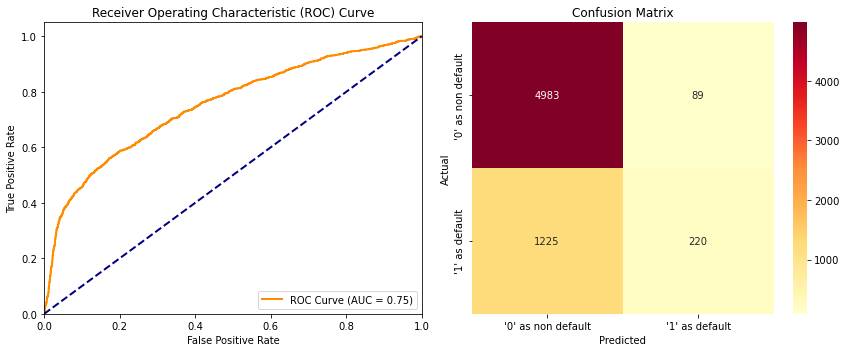

In [22]:
def model_performance(model, X_test, y_test):
    # Get the predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Calculate predictions and confusion matrix
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="YlOrRd",
                xticklabels=["'0' as non default", "'1' as default"],
                yticklabels=["'0' as non default", "'1' as default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Calculate and print precision, recall, and F1-score
    report = classification_report(y_test, y_pred, target_names=["'0' as non default", "'1' as default"])
    print("\nClassification Report:\n", report)

    # Show both plots
    plt.tight_layout()
    plt.show()

# Call the function with your logistic_model, X_test, and y_test
model_performance(logistic_model, X_test, y_test)


### Question: How effective is the logistic regression model in forecasting both '0' (representing non-default) and '1' (indicating default)?

The logistic regression model demonstrates a reasonable level of effectiveness in predicting both '0' (representing non-default) and '1' (indicating default) outcomes. Here's a summary of its performance:

* Overall Accuracy: 0.798 (approximately 79.8%), which signifies the proportion of correctly predicted outcomes.

* Confusion Matrix:
  - For '0' (non-default), it correctly predicted 4983 instances and misclassified 89 instances.
  - For '1' (default), it correctly predicted 220 instances and misclassified 1225 instances.

* Classification Report:
  - For '0' (non-default), it shows a precision of 0.80 (80%), recall of 0.98 (98%), and an F1-score of 0.88 (88%). This suggests that the model is good at identifying non-default cases.
  - For '1' (default), it has a precision of 0.71 (71%), recall of 0.15 (15%), and an F1-score of 0.25 (25%). While precision is decent, the recall and F1-score for default cases are relatively low, indicating that the model struggles to accurately predict defaults.

In summary, the logistic regression model performs well in identifying non-default cases but has limitations when it comes to predicting defaults. Further improvements might be needed, especially in enhancing recall and F1-score for default predictions.


##  Step 8 : Create a Random Forest Model

Split the data into training and testing datasets by using train_test_split.Fit a Random Forest model by using the training data. Make the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.
Evaluate the model’s performance by doing the following
 
 * Calculate the score of accuracy of Random Forest measure of how many predictions the model got correct out of the total predictions.
 * Make a confusion matrix that summarizes the performance of a classification algorithm.
 * Generate a dataframe of Original loan status vs Predicted loan status
 * Create a Classification Report

In [23]:

# Import the train_test_learn module

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make Prediction

y_pred_rf = random_forest_model.predict(X_test)

#  call the Accuracy

accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)


# print

print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Confusion Matrix:\n", confusion_rf)


OriginalVsPredictedlabel = pd.DataFrame({'Original loan status':y_test, 'predicted loan status': y_pred_rf})
OriginalVsPredictedlabel


Random Forest Accuracy: 0.9294153751726254

Random Forest Confusion Matrix:
 [[5025   47]
 [ 413 1032]]


,Original loan status,predicted loan status
14668,0,0
24614,0,0
11096,0,0
10424,1,1
26007,1,1
...,...,...
31330,0,0
2862,0,0
14754,0,0
14170,0,0



Classification Report:
                     precision    recall  f1-score   support

'0' as non default       0.80      0.98      0.88      5072
    '1' as default       0.71      0.15      0.25      1445

          accuracy                           0.80      6517
         macro avg       0.76      0.57      0.57      6517
      weighted avg       0.78      0.80      0.74      6517



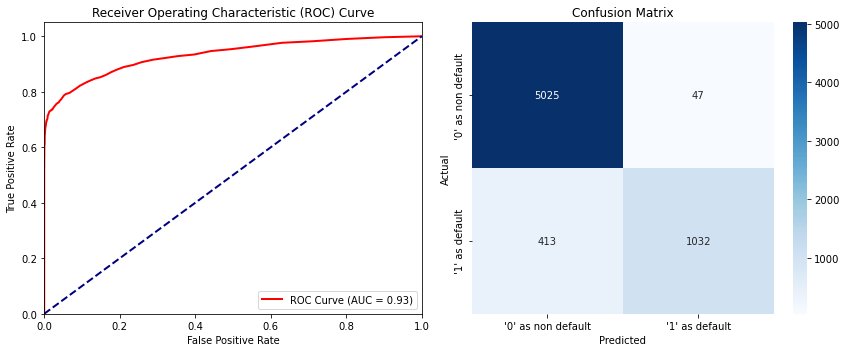

In [24]:
def evaluate_classifier(classifier, X_test, y_test):
    # Get the predicted probabilities for the positive class
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Calculate predictions and confusion matrix
    y_pred_rf = classifier.predict(X_test)
    confusion_rf = confusion_matrix(y_test, y_pred_rf)

    # Plot the confusion matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues",
                xticklabels=["'0' as non default", "'1' as default"],
                yticklabels=["'0' as non default", "'1' as default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    # Calculate and print precision, recall, and F1-score
    classification_rep_rf = classification_report(y_test, y_pred, target_names=["'0' as non default", "'1' as default"])
    print("\nClassification Report:\n", classification_rep_rf)

    # Show both plots
    plt.tight_layout()
    plt.show()

# Call the function with  random forest, X_test, and y_test
evaluate_classifier(random_forest_model, X_test, y_test)

### Question:  How well does the random forest model predict the values '0' (which represents non-default) and '1' (which indicates default)?

The random forest model demonstrates strong predictive performance for both '0' (representing non-default) and '1' (indicating default) values with an overall accuracy of 92.94%.


* For '0' (non-default) predictions:

   - Precision: 0.92
   - Recall: 0.99
   - F1-score: 0.96
   - Support: 5,072

* For '1' (default) predictions:

  - Precision: 0.96
  - Recall: 0.71
  - F1-score: 0.82
  - Support: 1,445

The model is particularly strong at identifying non-default cases ('0') with high precision and recall, resulting in a high F1-score of 0.96. However, it has slightly lower recall for default cases ('1'), but the precision is still relatively high at 0.96.

Overall, with an accuracy of 92.94%, the random forest model appears to be effective in predicting both non-default and default values, although there is some room for improvement in recall for the '1' class.

## Step 9 : XGboost Model

Split the data into training and testing datasets by using train_test_split.Fit a XGboost model by using the training data. Make the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.
Evaluate the model’s performance by doing the following
 
 * Calculate the score of accuracy of XGboost measure of how many predictions the model got correct out of the total predictions.
 * Make a confusion matrix that summarizes the performance of a classification algorithm.
 * Generate a dataframe of Original loan status vs Predicted loan status
 * Create a Classification Report

In [25]:

# Import the train_test_learn module

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make prediction

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# call Accuracy

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print

print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("\nXGBoost Classifier Confusion Matrix:\n", confusion_xgb)

OriginalVsPredictedlabel = pd.DataFrame({'Original loan status':y_test, 'predicted loan status': y_pred_xgb})
OriginalVsPredictedlabel



XGBoost Classifier Accuracy: 0.9344790547798066

XGBoost Classifier Confusion Matrix:
 [[5024   48]
 [ 379 1066]]


,Original loan status,predicted loan status
14668,0,0
24614,0,1
11096,0,0
10424,1,1
26007,1,1
...,...,...
31330,0,0
2862,0,0
14754,0,0
14170,0,0



Classification Report:
                     precision    recall  f1-score   support

'0' as non default       0.93      0.99      0.96      5072
    '1' as default       0.96      0.74      0.83      1445

          accuracy                           0.93      6517
         macro avg       0.94      0.86      0.90      6517
      weighted avg       0.94      0.93      0.93      6517



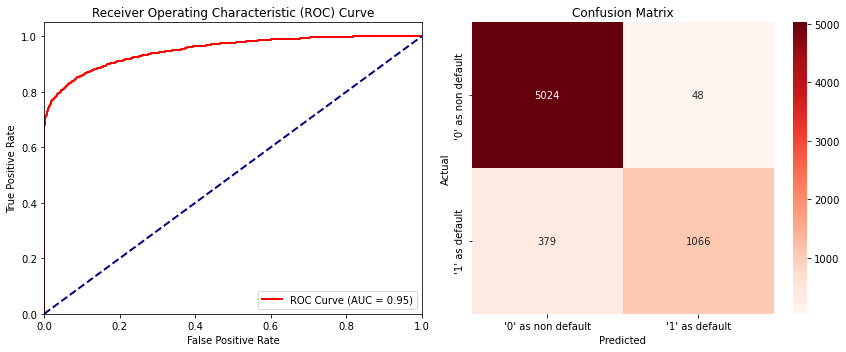

In [30]:
# define the function confusion matrix and Roc visualisation

def plot_confusion_matrix_and_roc(xgb_model, X_test, y_test):
    # Generate predicted probabilities for the positive class
    y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Select the probabilities for class '1'

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Calculate predictions and confusion matrix
    y_pred_xgb = xgb_model.predict(X_test)
    confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

    # Confusion matrix subplot
    plt.subplot(1, 2, 2)  # Changed the subplot index to 2
    sns.heatmap(confusion_xgb, annot=True, fmt="d", cmap="Reds",
                xticklabels=["'0' as non default", "'1' as default"],
                yticklabels=["'0' as non default", "'1' as default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    
    # Calculate and print precision, recall, and F1-score
    classification_rep_xgb = classification_report(y_test, y_pred_xgb, target_names=["'0' as non default", "'1' as default"])
    print("\nClassification Report:\n", classification_rep_xgb)
    
    # Show both plots
    plt.tight_layout()
    plt.show()

# Usage
plot_confusion_matrix_and_roc(xgb_model, X_test, y_test)



### Question:  How well does the random forest model predict the values '0' (which represents non-default) and '1' (which indicates default)?

The XGBoost Classifier model demonstrates a high level of accuracy, with an accuracy score of approximately 0.9345. This indicates that the model performs well in correctly predicting both '0' (representing non-default) and '1' (indicating default) values.

In the context of credit risk prediction:

* The model correctly identified 1066 instances of default ('1') out of the total 1445 actual defaults.
* It correctly identified 5024 instances as non-default ('0') out of the total 5072 actual non-default cases.
* There were 48 cases where the model predicted default when it was not, and 379 cases where it predicted non-default when it was actually default.

The weighted average accuracy is approximately 93%, which means that the model performs well overall in classifying both '0' and '1'.

In summary, the XGBoost Classifier model has a high accuracy and precision in predicting non-default cases ('0'), but it has a slightly lower recall for default cases ('1'). This suggests that while the model accurately identifies non-default cases, it may miss some of the actual default cases. The model's overall performance, as indicated by the accuracy and F1-score, is strong.

## Step 10 :

### Question : Which is the best model?

The choice of the best model depends on the specific goals and priorities of the task at hand.Comparing the three different machine learning models, here's a summary of their performance:

1. **Logistic Regression Model**:
   - **Accuracy**: Approximately 79.8%.
   - **Strengths**: Good precision, recall, and F1-score for non-default cases ('0').
   - **Weaknesses**: Poor recall and F1-score for default cases ('1').

2. **Random Forest Model**:
   - **Accuracy**: 92.94%.
   - **Strengths**: High precision, recall, and F1-score for both non-default ('0') and default ('1') cases.
   - **Weaknesses**: Slightly lower recall for default cases ('1') compared to non-default cases.

3. **XGBoost Classifier Model**:
   - **Accuracy**: Approximately 93.45%.
   - **Strengths**: High accuracy, precision, and F1-score for non-default cases ('0').
   - **Weaknesses**: Slightly lower recall for default cases ('1') compared to non-default cases.

Among these three models, the XGBoost Classifier model appears to perform the best overall due to its high accuracy, precision, and F1-score for non-default cases, as well as relatively good performance for default cases. However, the choice of the "best" model may also depend on specific business or application requirements. If minimizing false negatives (missing default cases) is crucial, the Random Forest model might be preferred due to its relatively higher recall for '1'. Conversely, if overall balanced performance is more important, the XGBoost Classifier model may be the top choice.